In [60]:
import pandas as pd
import numpy as np
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes

import requests
import StringIO
import zipfile

#1(a)
sal=pd.read_csv("/Users/rushabh/Rushabh/Untitled Folder/lahman-csv_2014-02-14/Salaries.csv")
teams=pd.read_csv("/Users/rushabh/Rushabh/Untitled Folder/lahman-csv_2014-02-14/Teams.csv")

print sal.head()
print "------------------------"
print teams.head()

   yearID teamID lgID   playerID   salary
0    1985    BAL   AL  murraed02  1472819
1    1985    BAL   AL   lynnfr01  1090000
2    1985    BAL   AL  ripkeca01   800000
3    1985    BAL   AL   lacyle01   725000
4    1985    BAL   AL  flanami01   641667
------------------------
   yearID lgID teamID franchID divID  Rank   G  Ghome   W   L     ...       \
0    1871  NaN    PH1      PNA   NaN     1  28    NaN  21   7     ...        
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9     ...        
2    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10     ...        
3    1871  NaN    WS3      OLY   NaN     4  32    NaN  15  15     ...        
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17     ...        

   DP    FP                     name                      park  attendance  \
0 NaN  0.84   Philadelphia Athletics  Jefferson Street Grounds         NaN   
1 NaN  0.82  Chicago White Stockings   Union Base-Ball Grounds         NaN   
2 NaN  0.83     Bost

In [61]:
#1(b)

summarized_sal = sal[['yearID','teamID','salary']].groupby(['yearID','teamID'], as_index=False).sum()
summarized_sal.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


In [62]:
#1(c)

final = pd.merge(summarized_sal,teams[['yearID','teamID','W']], on=['yearID','teamID'])
final.head()

,yearID,teamID,salary,W
0,1985,ATL,14807000,66
1,1985,BAL,11560712,83
2,1985,BOS,10897560,81
3,1985,CAL,14427894,90
4,1985,CHA,9846178,85


In [76]:
final.shape
final.dtypes
year_final=final[['yearID','teamID','salary','W']].groupby(['yearID'],as_index=False)

print year_final.head(1)

print "################"
print "----------------"


     yearID teamID     salary    W
0      1985    ATL   14807000   66
26     1986    ATL   17102786   72
52     1987    ATL   16544560   69
78     1988    ATL   12728174   54
104    1989    ATL   11112334   63
130    1990    ATL   14555501   65
156    1991    ATL   18403500   94
182    1992    ATL   34625333   98
208    1993    ATL   41641417  104
236    1994    ATL   49383513   68
264    1995    ATL   47235445   90
292    1996    ATL   49698500   96
320    1997    ANA   31135472   84
348    1998    ANA   41281000   85
378    1999    ANA   55388166   70
408    2000    ANA   51464167   82
438    2001    ANA   47535167   75
468    2002    ANA   61721667   99
498    2003    ANA   79031667   77
528    2004    ANA  100534667   92
558    2005    ARI   62329166   77
588    2006    ARI   59684226   76
618    2007    ARI   52067546   90
648    2008    ARI   66202712   82
678    2009    ARI   73115666   70
708    2010    ARI   60718166   65
738    2011    ARI   53639833   94
768    2012    ARI  

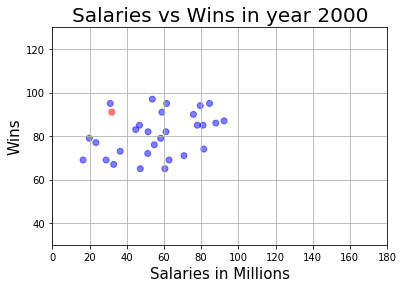

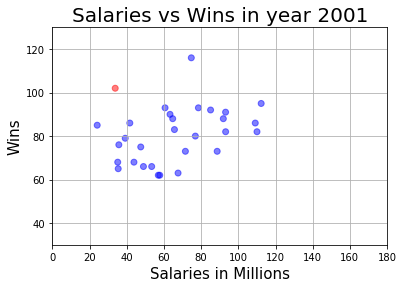

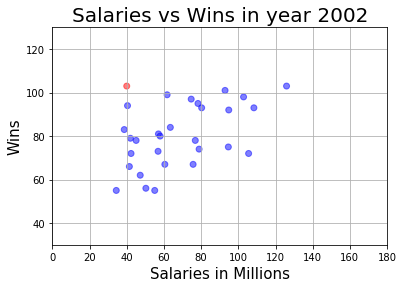

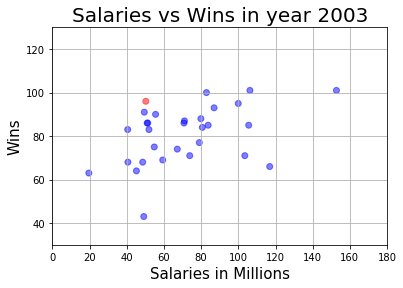

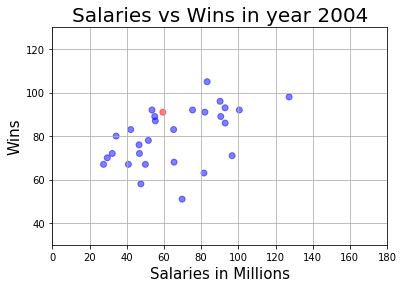

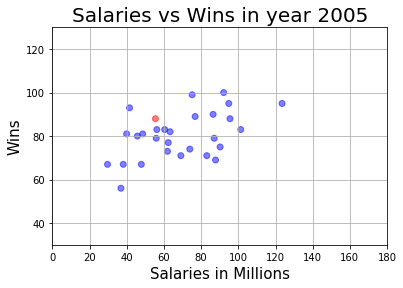

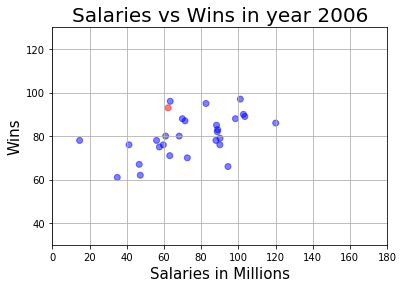

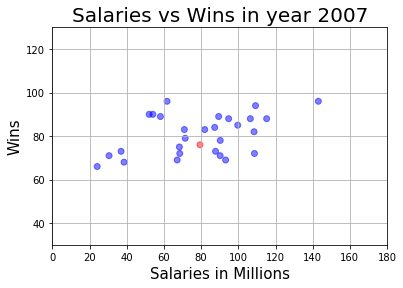

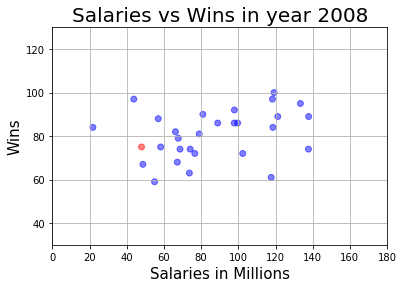

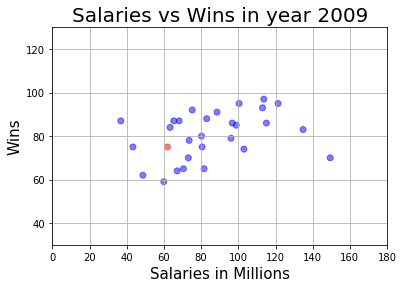

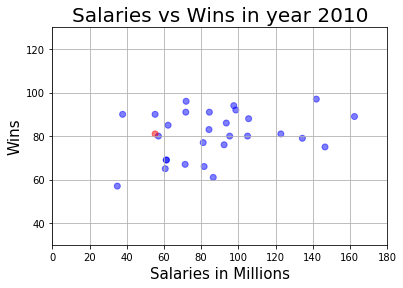

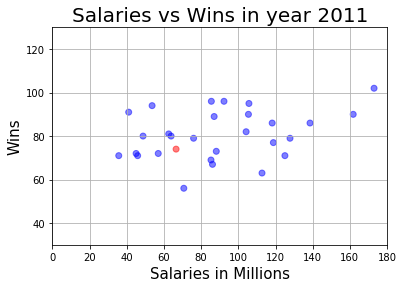

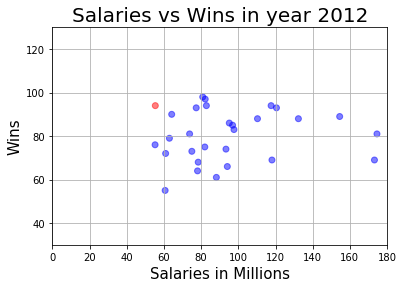

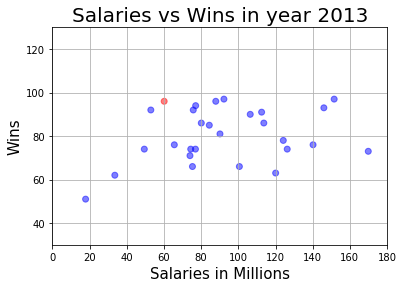

In [123]:
for i in range(2000,2014):
    current_year=final[final['yearID']==i]
    plt.scatter(current_year.salary/1e6,current_year.W, alpha=0.5, color=map(lambda x: 'red' if x=='OAK' else 'blue',current_year.teamID))
    plt.title("Salaries vs Wins in year "+ str(i),fontsize=20)
    plt.xlabel("Salaries in Millions",fontsize=15)
    plt.ylabel("Wins", fontsize=15)
    plt.xlim(0, 180)
    plt.ylim(30, 130)
    plt.grid()
    plt.show()


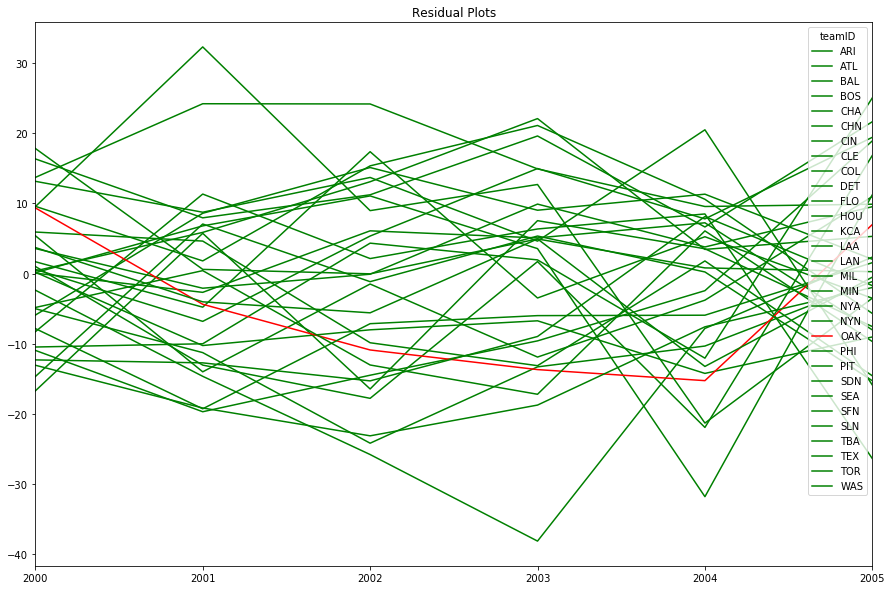

In [150]:
#1E
residual=pd.DataFrame()

for i in range(2000,2006):
    current=final[final['yearID']==i]
    x_vals=current['salary'].values/1e6
    y_vals=current['W'].values
    y=y_vals
    A = np.vstack([x_val, np.ones(len(x_val))]).T
    m, c = np.linalg.lstsq(A, y)[0] 
    y_hat=m*x_vals+c
    residual[i]=y-y_hat
    
residual.index=current['teamID']
#print residual
#print"##################"
residual = residual.T
#print residual
#print "%%%%%%%%%%%%%%%%%%%%"
residual.index = residual.index.format()

residual.plot(title="Residual Plots",figsize=(15,10),color= map(lambda x: 'red' if x=='OAK' else 'green',current_year.teamID))
plt.show()
